In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,NaN,2.0,9.0,11.0,7.0,7.0,1.0,8.0,NaN,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,NaN,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,NaN,NaN,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,NaN,7.0,10.0,7.0,9.0,NaN,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,NaN,NaN,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1000
float64		column 2	1000
float64		column 3	1500
float64		column 4	1250
float64		column 5	1000
float64		column 6	1250
float64		column 7	500
float64		column 8	1000
float64		column 9	1000
float64		column 10	750
float64		column 11	750
float64		column 12	1000
float64		column 13	1500
float64		column 14	250
float64		column 15	1500
float64		column 16	750
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,19000.000000,19000.000000,18500.000000,18750.000000,19000.000000,18750.00000,19500.000000,19000.000000,19000.000000,19250.000000,19250.000000,19000.000000,18500.000000,19750.000000,18500.000000,19250.000000,0.0
mean,4.015789,7.046947,5.113730,5.383040,3.495737,6.91232,7.499795,4.602895,5.182842,8.271065,6.445455,7.930526,3.027676,8.337519,3.679081,7.799584,NaN
std,1.878308,3.252308,1.962301,2.214545,2.151086,1.98318,2.302288,2.637800,2.344830,2.462136,2.591855,2.034653,2.276353,1.535808,2.504461,1.597975,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.00000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.00000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.00000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

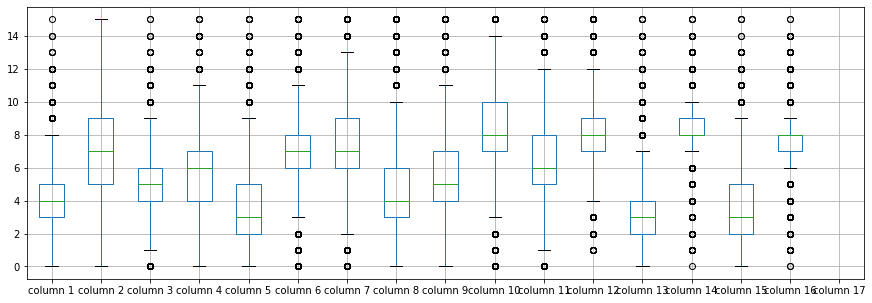

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.015789
column 2     7.046947
column 3     5.113730
column 4     5.383040
column 5     3.495737
column 6     6.912320
column 7     7.499795
column 8     4.602895
column 9     5.182842
column 10    8.271065
column 11    6.445455
column 12    7.930526
column 13    3.027676
column 14    8.337519
column 15    3.679081
column 16    7.799584
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.748265,0.843238,0.659710,0.607822,-0.024827,0.045863,0.018848,0.048997,0.143080,0.039070,-0.039547,0.476777,0.097109,0.258787,-0.100051,NaN
column 2,0.748265,1.000000,0.656974,0.813284,0.543906,0.049336,-0.037945,-0.024899,0.093170,0.157239,-0.051324,-0.006074,0.269324,-0.002030,0.218505,-0.044545,NaN
column 3,0.843238,0.656974,1.000000,0.646378,0.754898,0.065890,0.028118,-0.092104,0.054961,0.107509,0.012902,-0.042705,0.539734,0.047200,0.250029,-0.120939,NaN
column 4,0.659710,0.813284,0.646378,1.000000,0.632559,0.045027,-0.020108,0.081413,0.057326,0.010749,-0.008637,0.027463,0.259314,0.025001,0.282199,-0.019005,NaN
column 5,0.607822,0.543906,0.754898,0.632559,1.000000,0.139822,-0.029925,-0.010655,-0.062389,-0.066757,-0.069073,-0.037620,0.610176,0.017022,0.475368,-0.064225,NaN
column 6,-0.024827,0.049336,0.065890,0.045027,0.139822,1.000000,-0.347040,-0.054507,-0.121658,0.090359,-0.338292,-0.029527,0.147292,-0.249226,0.127795,0.240858,NaN
column 7,0.045863,-0.037945,0.028118,-0.020108,-0.029925,-0.347040,1.000000,-0.114566,-0.049201,0.171927,0.591496,-0.262090,-0.037385,0.551023,-0.074689,-0.207970,NaN
column 8,0.018848,-0.024899,-0.092104,0.081413,-0.010655,-0.054507,-0.114566,1.000000,-0.174713,-0.312674,0.037787,0.081917,0.135756,-0.080634,0.018422,0.182720,NaN
column 9,0.048997,0.093170,0.054961,0.057326,-0.062389,-0.121658,-0.049201,-0.174713,1.000000,0.128558,-0.061681,0.108373,-0.372599,-0.051600,0.264163,-0.061616,NaN
column 10,0.143080,0.157239,0.107509,0.010749,-0.066757,0.090359,0.171927,-0.312674,0.128558,1.000000,0.052026,-0.097221,-0.167901,0.031356,-0.082683,-0.115115,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+4,17+4+4,17+4+4+4,17+4+4,17+4,17], vae_layer = False, seed = 40)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 75.61457058410645
Epoch: 1 , loss: 48.869843008422855
Epoch: 2 , loss: 44.26902487792969
Epoch: 3 , loss: 42.647399627685544
Epoch: 4 , loss: 41.57435585784912
Epoch: 5 , loss: 40.97868822479248
Epoch: 6 , loss: 40.60637879486084
Epoch: 7 , loss: 40.186253996276854
Epoch: 8 , loss: 39.941438688659666
Epoch: 9 , loss: 39.90043864440918
Epoch: 10 , loss: 39.59423523712158
Epoch: 11 , loss: 39.4456256439209
Epoch: 12 , loss: 39.44773512573242
Epoch: 13 , loss: 39.29525787353516
Epoch: 14 , loss: 39.34576849822998
Epoch: 15 , loss: 39.09735615539551
Epoch: 16 , loss: 39.10197550048828
Epoch: 17 , loss: 39.01911024627685
Epoch: 18 , loss: 38.96061653747559
Epoch: 19 , loss: 38.73020230255127
Epoch: 20 , loss: 38.80910622253418
Epoch: 21 , loss: 38.81500972595215
Epoch: 22 , loss: 38.81351587524414
Epoch: 23 , loss: 38.72549286499024
Epoch: 24 , loss: 38.607518453979495
Epoch: 25 , loss: 38.530901614379886
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    3.388830
column 16    8.000000
column 17   -0.003038
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.000000,0.000000,0.0,0.0,0.0,0.0,-3.173938,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,-2.297238,0.0,NaN
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
2,-3.056525,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,-9.125225,3.395155,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,2.517345,0.000000,0.0,0.0,0.0,0.760788,0.0,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
19996,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
19997,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN
19998,-0.412941,-4.713218,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

403.3943708828978

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.10803808391999052

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      5.397113
column 3      3.948033
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.005406
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.000000,4.000000,4.0,3.0,2.0,7.0,4.826062,2.000000,9.000000,11.0,7.0,7.0,1.000000,8.0,2.702762,6.0,-0.006263
1,4.000000,7.000000,5.0,5.0,5.0,5.0,9.000000,6.000000,4.000000,8.0,7.0,9.0,2.000000,9.0,7.000000,10.0,-0.004940
2,3.943475,10.000000,8.0,7.0,4.0,8.0,8.000000,5.000000,10.000000,11.0,2.0,8.0,2.000000,5.0,5.000000,10.0,-0.002904
3,4.000000,9.000000,5.0,7.0,4.0,7.0,7.000000,3.874775,4.395155,7.0,6.0,8.0,3.000000,8.0,0.000000,8.0,-0.002145
4,6.000000,7.000000,8.0,5.0,4.0,7.0,6.000000,5.517345,7.000000,10.0,7.0,9.0,3.760788,8.0,3.000000,7.0,-0.000378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.000000,10.000000,5.0,8.0,3.0,4.0,10.000000,7.000000,8.000000,12.0,10.0,9.0,2.000000,9.0,2.000000,6.0,0.002160
19996,4.000000,7.000000,6.0,5.0,3.0,7.0,8.000000,2.000000,10.000000,12.0,6.0,8.0,1.000000,9.0,6.000000,8.0,-0.002203
19997,4.000000,8.000000,4.0,6.0,4.0,7.0,8.000000,7.000000,4.000000,10.0,7.0,6.0,3.000000,9.0,3.000000,7.0,-0.000300
19998,3.587059,6.286782,4.0,8.0,3.0,0.0,2.000000,4.000000,6.000000,1.0,0.0,7.0,0.000000,8.0,0.000000,8.0,-0.001526


In [21]:
imputations[-1].to_excel("Letter_NN_5(imp).xlsx", index=False, header=False)